# Coal Plants IGP

## **Data Exploration And Analysis**

In [18]:
# !pip install plotly

In [15]:
import pandas as pd
import os
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




In [5]:
# Load the CSV data into a DataFrame
os.chdir(r"D:\ERASMUS\France_Sem3\side projects\APAD_oxford\Final_Dataset_Folder\APAD-Asset-Data\Asset Data\IGP\Asset_Data_IGP\Coal Plants\Coal_Plants_IGP")
df = pd.read_csv('Coal_Plants_IGP_28_01_25.csv')

# Display the first few rows of the DataFrame
df.head()


,plant_name,country,cap_all,total_cap,sts_all,units,status,prod_kw,nox_ef,nox_tn_y,so2_ef,so2_tn_y,p10_ef,p10_tn_y,pm25_ef,p25_tn_y,lat,lon
0,Barapukuria power station,Bangladesh,"125, 125, 275",525.0,"operating, operating, operating",3.0,operating,4599000000,4.3,19775.70,7.2,33112.80,0.37,1701.630,0.19,873.810,25.553757,88.948631
1,Patuakhali power station (RPCL/NORINCO),Bangladesh,"660, 660",1320.0,"construction, construction",2.0,construction,11563200000,4.3,49721.76,7.2,83255.04,0.37,4278.384,0.19,2197.008,22.025149,90.312349
2,Payra power station (BCPCL),Bangladesh,"660, 660, 660, 660",2640.0,"operating, operating, construction, construction",4.0,operating,23126400000,4.3,99443.52,7.2,166510.08,0.37,8556.768,0.19,4394.016,22.001974,90.308210
3,Rampal power station,Bangladesh,"660, 660",1320.0,"operating, construction",2.0,operating,11563200000,4.3,49721.76,7.2,83255.04,0.37,4278.384,0.19,2197.008,22.592458,89.556427
4,Adani Godda power station,India,"800, 800",1600.0,"operating, operating",2.0,operating,14016000000,4.3,60268.80,7.2,100915.20,0.37,5185.920,0.19,2663.040,24.814110,87.135470


## **Plot the Points on a Map with Circles Based on the Number of Units**

In [6]:
# Create a base map
m = folium.Map(location=[20, 80], zoom_start=5)

# Add points to the map with circle markers based on the number of units
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=row['units'] * 2,  # Scale the radius for better visibility
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['plant_name']} - Units: {row['units']}"
    ).add_to(m)

# Display the map
m

## **Make Charts and Plots for Plant Units in Each Country**

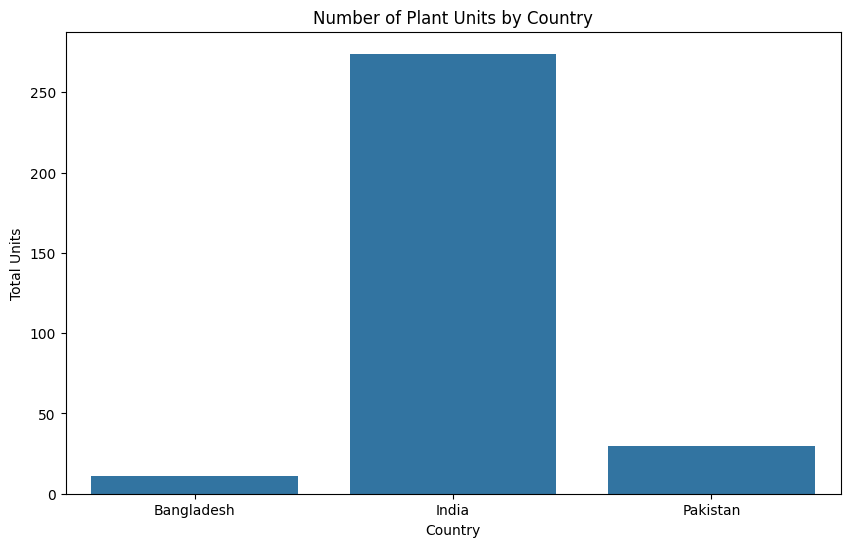

In [7]:
# Group by country and sum the units
country_units = df.groupby('country')['units'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='units', data=country_units)
plt.title('Number of Plant Units by Country')
plt.xlabel('Country')
plt.ylabel('Total Units')
plt.show()

## **Pollutant Estimate Country Wise**

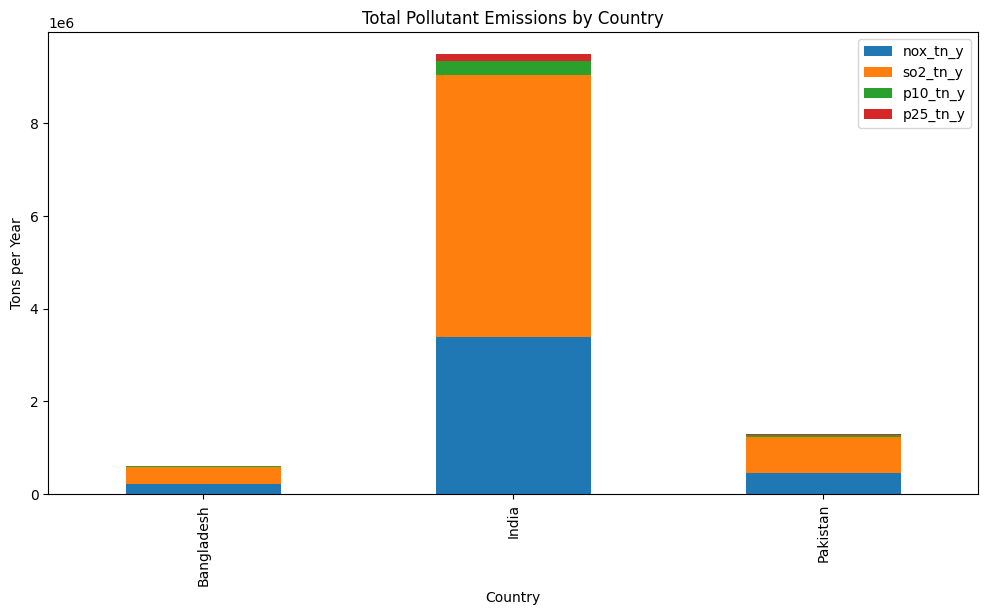

In [9]:
# Calculate total pollutants by country
pollutants = ['nox_tn_y', 'so2_tn_y', 'p10_tn_y', 'p25_tn_y']
country_pollutants = df.groupby('country')[pollutants].sum().reset_index()

# Plot the data
country_pollutants.set_index('country').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Pollutant Emissions by Country')
plt.xlabel('Country')
plt.ylabel('Tons per Year')
plt.show()

## **Interactive Map with Pollutant Information on Click**

In [11]:
# Create a base map
m = folium.Map(location=[20, 80], zoom_start=5)

# Add points to the map with popups showing pollutant contributions
for idx, row in df.iterrows():
    popup_content = f"""
    <b>{row['plant_name']}</b><br>
    NOx: {row['nox_tn_y']} tn/y<br>
    SO2: {row['so2_tn_y']} tn/y<br>
    P10: {row['p10_tn_y']} tn/y<br>
    PM2.5: {row['p25_tn_y']} tn/y
    """
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=row['units'] * 2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=popup_content
    ).add_to(m)

# Display the map
m

## **For Users to Load and Visualize Data**


In [17]:
# Instructions for layman users
print("""
To load and visualize the data:

1. Ensure you have Python installed on your system.
2. Install the required libraries by running:
   pip install pandas matplotlib seaborn folium
3. Download the CSV file from the repository.
4. Use the following code to load and visualize the data:

import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('path_to_your_csv_file.csv')

# Create a map
m = folium.Map(location=[20, 80], zoom_start=5)
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=row['units'] * 2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['plant_name']} - Units: {row['units']}"
    ).add_to(m)
m

# Plot the number of units by country
country_units = df.groupby('country')['units'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='units', data=country_units)
plt.title('Number of Plant Units by Country')
plt.xlabel('Country')
plt.ylabel('Total Units')
plt.show()
""")


To load and visualize the data:

1. Ensure you have Python installed on your system.
2. Install the required libraries by running:
   pip install pandas matplotlib seaborn folium
3. Download the CSV file from the repository.
4. Use the following code to load and visualize the data:

import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('path_to_your_csv_file.csv')

# Create a map
m = folium.Map(location=[20, 80], zoom_start=5)
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=row['units'] * 2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['plant_name']} - Units: {row['units']}"
    ).add_to(m)
m

# Plot the number of units by country
country_units = df.groupby('country')['units'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='units', data=country_units)
plt.t